# Loading Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
RawData = pd.read_csv("train.csv")

In [3]:
RawData

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
print(RawData.isnull().sum().sort_values(ascending = False))

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
                 ... 
CentralAir          0
SaleCondition       0
Heating             0
TotalBsmtSF         0
Id                  0
Length: 81, dtype: int64


# Data Preparation

In [5]:
def ShowSimpleHist(Data_List, width = 7, height = 7):
    import matplotlib.pyplot as plt
    %matplotlib inline

    plt.close()
    axes = plt.figure(figsize=(width, height)).add_subplot(111)  # RowsColumnsIndex
                                                        # Index starts upper left corner
    plt.hist(Data_List)
    plt.show()

In [6]:
RawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

Identify fields with nulls

In [7]:
RawData.columns[(RawData.isnull().sum() > 0)].to_list()

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [8]:
RawData.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

* ID:

In [9]:
RawData.set_index("Id");

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

In [10]:
RawData["MSSubClass"].value_counts().sort_index()

20     536
30      69
40       4
45      12
50     144
60     299
70      60
75      16
80      58
85      20
90      52
120     87
160     63
180     10
190     30
Name: MSSubClass, dtype: int64

In [11]:
RawData["BuildingClass"] = RawData["MSSubClass"].map({
    20 : "1_story_1946",
    30 : "1_story_1945",
    40 : "1_story_finished_attic",
    45 : "1_5-story_unfinished",
    50 : "1_5-story_finished",
    60 : "2_story_1946",
    70 : "2_story_1945",
    75 : "2_5_story",
    80 : "Split_multilevel",
    85 : "Split_foyer",
    90 : "Duplex",
    120: "1_story_PUD_1946",
    150: "1_5_story_PUD",
    160: "2_story_PUD",
    180: "PUD_multilevel",
    190: "2_Family_Conersion"
})

In [12]:
RawData["SplitLevel"] = RawData["MSSubClass"].apply(lambda x: 1 if (x == 80 or x == 85) else 0)

In [13]:
RawData["SplitLevel"].value_counts()

0    1382
1      78
Name: SplitLevel, dtype: int64

In [14]:
RawData.drop("MSSubClass", axis = 1, inplace = True)

YearBuilt: Original construction date

In [15]:
RawData["YearBuilt"].describe()

count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64

In [16]:
RawData[RawData["YearBuilt"] >= 2000]["YearBuilt"].describe()

count     388.000000
mean     2004.737113
std         2.338966
min      2000.000000
25%      2003.000000
50%      2005.000000
75%      2006.000000
max      2010.000000
Name: YearBuilt, dtype: float64

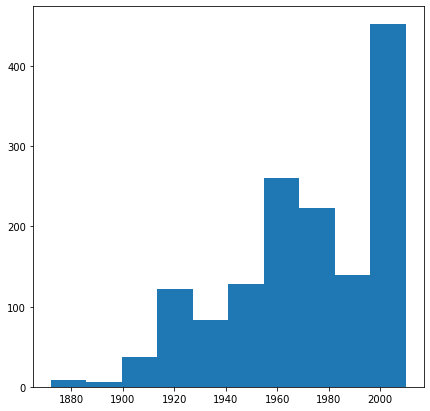

In [17]:
ShowSimpleHist(RawData["YearBuilt"])

In [18]:
def ShowSimpleScatterRelation(DataSeries_X, DataSeries_Y, width = 5, height = 5):
    import matplotlib.pyplot as plotter
    %matplotlib inline

    plotter.close("all")
    axes = plotter.figure(figsize = (width, height)).add_subplot(111)  # RowsColumnsIndex
                                                        # Index starts upper left corner
    axes.scatter(DataSeries_X, DataSeries_Y, s = 1, edgecolors = None)
    plotter.show()

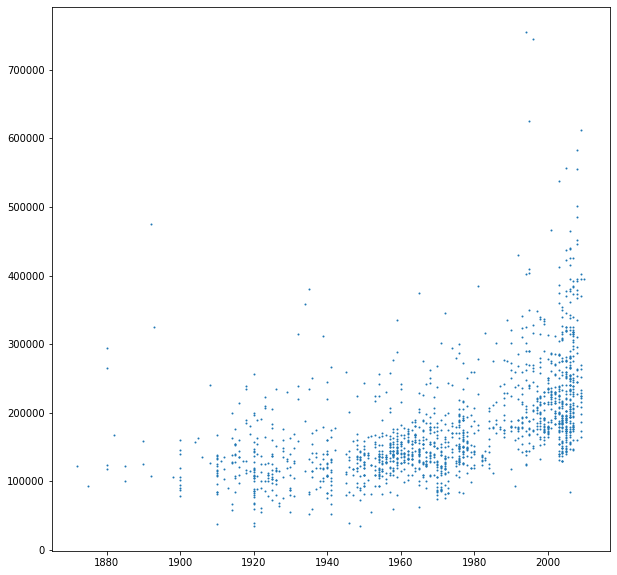

In [19]:
ShowSimpleScatterRelation(RawData["YearBuilt"], RawData["SalePrice"], 10, 10)

#### Create age groups by decade
    0 :      - 1945  Historical builds
    1 : 1946 - 1976 (Postwar boom to asbestos ban)
    2 : 1977 - 2000
    3 : 2000 - 2010 (Recent construction)

In [20]:
#RawData["AgeGroup"] = RawData["YearBuilt"].apply(lambda x: 0 if x <= 1945 else 1 if x <= 1976 else 2 if x <= 2000 else 3)

In [21]:
#ShowSimpleHist(RawData["AgeGroup"])

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

In [22]:
RawData["YearRemodAdd"].describe()

count    1460.000000
mean     1984.865753
std        20.645407
min      1950.000000
25%      1967.000000
50%      1994.000000
75%      2004.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64

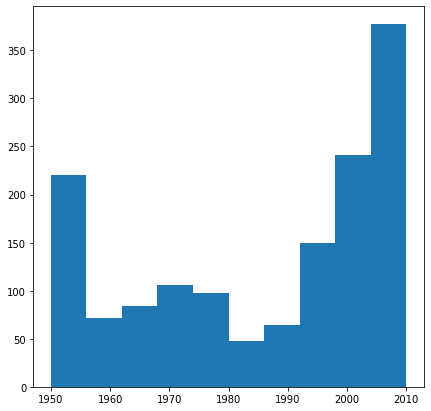

In [23]:
ShowSimpleHist(RawData["YearRemodAdd"])

#### Create groups based on styling
    0 :      - 1980 Outdated
    1 : 1981 - 2000 Somewhat older
    2 : 2001 - 2010 Contemporary

In [24]:
RawData["Remodeled"] = (RawData["YearBuilt"] != RawData["YearRemodAdd"])

In [25]:
RawData["Styling"] = RawData.loc[RawData["YearBuilt"] > 1945, "YearRemodAdd"].apply(lambda x: 1 if x <= 1980 else 2 if x <= 2000 else 3)
RawData.loc[RawData["YearBuilt"] <= 1945, "Styling"] = 0

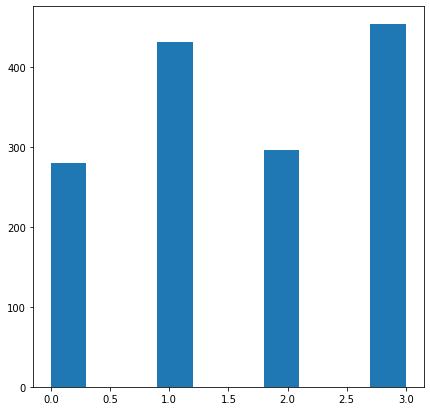

In [26]:
 ShowSimpleHist(RawData["Styling"])

In [27]:
# RawData["Styling"].describe()

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

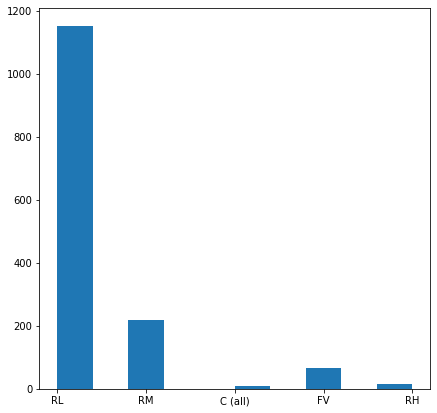

In [28]:
ShowSimpleHist(RawData["MSZoning"])

> Not interested in industrial and commerical properties (which have a very different market than residential)

In [29]:
RawData = RawData[RawData["MSZoning"] != "C (all)"]

In [30]:
RawData.loc[:, "MSZoning"] = RawData["MSZoning"].replace("RH", "RM")

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


LotFrontage: Linear feet of street connected to property


In [31]:
RawData["LotFrontage"].isnull().sum()

259

In [32]:
RawData[RawData["LotFrontage"].isnull()]["LotArea"].value_counts()

4426      3
11250     3
2117      3
7750      3
12155     2
         ..
16647     1
164660    1
4403      1
16545     1
12800     1
Name: LotArea, Length: 235, dtype: int64

In [33]:
RawData[RawData["LotFrontage"].isnull()]["Neighborhood"].value_counts()

NAmes      39
Gilbert    30
NWAmes     28
Sawyer     26
CollgCr    24
ClearCr    15
Mitchel    13
Crawfor    10
SawyerW     9
Timber      8
NoRidge     8
Somerst     8
Edwards     8
BrkSide     7
StoneBr     5
Veenker     4
OldTown     4
IDOTRR      3
Blmngtn     3
MeadowV     2
SWISU       2
NPkVill     2
NridgHt     1
Name: Neighborhood, dtype: int64

In [34]:
RawData[RawData["LotFrontage"].notnull()]["Neighborhood"].value_counts() / RawData[RawData["LotFrontage"].isnull()]["Neighborhood"].value_counts()

Blmngtn     4.666667
Blueste          NaN
BrDale           NaN
BrkSide     7.285714
ClearCr     0.866667
CollgCr     5.250000
Crawfor     4.100000
Edwards    11.500000
Gilbert     1.633333
IDOTRR      8.333333
MeadowV     7.500000
Mitchel     2.769231
NAmes       4.769231
NPkVill     3.500000
NWAmes      1.607143
NoRidge     4.125000
NridgHt    76.000000
OldTown    27.000000
SWISU      11.500000
Sawyer      1.846154
SawyerW     5.555556
Somerst     9.750000
StoneBr     4.000000
Timber      3.750000
Veenker     1.750000
Name: Neighborhood, dtype: float64

In [35]:
RawData[RawData["LotFrontage"].isnull()]["HouseStyle"].value_counts()

1Story    128
2Story     83
SLvl       21
1.5Fin     18
SFoyer      7
1.5Unf      1
2.5Unf      1
Name: HouseStyle, dtype: int64

In [36]:
#ShowSimpleScatter(RawData["LotFrontage"] / RawData["LotArea"], 10, 10)

In [37]:
temp = RawData[RawData["LotFrontage"].isnull()][["Id", "Neighborhood", "HouseStyle"]]

for rowData in temp.itertuples(index = True):
    #print(RawData.iloc[rowData.Index, :])
    #print(rowData)
    #print(RawData.loc[(RawData["Neighborhood"] == rowData[1]) & (RawData["HouseStyle"] == rowData[2]), "LotFrontage"].mean())
    #RawData.iloc[rowData.Index, np.where(RawData.columns.values == "LotFrontage")[0][0]] = RawData.loc[(RawData["Neighborhood"] == rowData[1]) & (RawData["HouseStyle"] == rowData[2]), "LotFrontage"].mean()
    #RawData.loc[(RawData["Id"] == rowData["Id"]), np.where(RawData.columns.values == "LotFrontage")[0][0]] = RawData.loc[(RawData["Neighborhood"] == rowData[2]) & (RawData["HouseStyle"] == rowData[3]), "LotFrontage"].mean()
    RawData.loc[(RawData["Neighborhood"] == rowData[2]) & (RawData["HouseStyle"] == rowData[3]) & (RawData["LotFrontage"].isnull()), "LotFrontage"] = RawData.loc[(RawData["Neighborhood"] == rowData[2]) & (RawData["HouseStyle"] == rowData[3]), "LotFrontage"].mean()

In [38]:
#RawData.iloc[12, 3] = 1

In [39]:
#RawData.iloc[10:35, 0:15]

In [40]:
#RawData[(RawData["Neighborhood"] == "Sawyer") & (RawData["HouseStyle"] == "1Story")]["LotFrontage"]

In [41]:
RawData["LotFrontage"].isnull().sum()

4

In [42]:
temp = RawData[RawData["LotFrontage"].isnull()][["Id", "Neighborhood"]]

for rowData in temp.itertuples(index = True):
    #print(RawData.iloc[rowData.Index, :])
    #print(rowData)
    #print(RawData.loc[(RawData["Neighborhood"] == rowData[1]) & (RawData["HouseStyle"] == rowData[2]), "LotFrontage"].mean())
    #RawData.iloc[rowData.Index, np.where(RawData.columns.values == "LotFrontage")[0][0]] = RawData.loc[(RawData["Neighborhood"] == rowData[1]) & (RawData["HouseStyle"] == rowData[2]), "LotFrontage"].mean()
    #RawData.loc[(RawData["Id"] == rowData["Id"]), np.where(RawData.columns.values == "LotFrontage")[0][0]] = RawData.loc[(RawData["Neighborhood"] == rowData[2]) & (RawData["HouseStyle"] == rowData[3]), "LotFrontage"].mean()
    RawData.loc[(RawData["Neighborhood"] == rowData[2]) & (RawData["LotFrontage"].isnull()), "LotFrontage"] = RawData.loc[(RawData["Neighborhood"] == rowData[2]), "LotFrontage"].mean()

In [43]:
RawData["LotFrontage"].isnull().sum()

0

In [44]:
def ShowSimpleScatter(DataSeries, width = 5, height = 5):
    import matplotlib.pyplot as plotter
    %matplotlib inline

    plotter.close("all")
    axes = plotter.figure(figsize = (width, height)).add_subplot(111)  # RowsColumnsIndex
                                                        # Index starts upper left corner
    x_data = list(range(len(DataSeries)))
    axes.scatter(x_data, DataSeries, s = 1, edgecolors = None)
    plotter.show()

LotArea: Lot size in square feet

Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved

In [45]:
RawData["Street"].unique()

array(['Pave', 'Grvl'], dtype=object)

In [46]:
RawData["StreetPaving"] = RawData["Street"].apply(lambda x: 1 if x == "Pave" else 0)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access

In [47]:
RawData["Alley"].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [48]:
RawData["AlleyAccess"] = RawData["Alley"].notnull().astype("uint8")

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular

In [49]:
RawData.loc[:, "LotShapeRegularity"] = RawData["LotShape"].map({
    "Reg" : 0,
    "IR1" : 1,
    "IR2" : 2,
    "IR3" : 3,
}).astype("uint8")

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)


LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression

In [50]:
RawData["LandContour"].unique()

array(['Lvl', 'Bnk', 'Low', 'HLS'], dtype=object)

In [51]:
RawData["Hills"] = RawData["LandContour"].apply(lambda x: 0 if (x == "lvl") else -1 if (x == "Low") else 1)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only

In [52]:
RawData["Utilities"].unique()

array(['AllPub', 'NoSeWa'], dtype=object)

In [53]:
RawData.loc[:, "Utility-All"] = RawData["Utilities"] == "AllPub"

LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property

In [54]:
RawData["LotConfig"].value_counts()

Inside     1044
Corner      261
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [55]:
RawData.loc[: ,"LotAccessibility"] = RawData["LotConfig"].apply(lambda x: "Corner" if (x == "FR2" or x == "FR3") else x)

LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope

In [56]:
RawData["LandSlope"].unique()

array(['Gtl', 'Mod', 'Sev'], dtype=object)

In [57]:
RawData["LandGrading"] = RawData["LandSlope"].map({
    "Gtl" : 0,
    "Mod" : 1,
    "Sev" : 2,
})

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker

In [58]:
pd.Series(np.sort(RawData["Neighborhood"].unique()))

0     Blmngtn
1     Blueste
2      BrDale
3     BrkSide
4     ClearCr
5     CollgCr
6     Crawfor
7     Edwards
8     Gilbert
9      IDOTRR
10    MeadowV
11    Mitchel
12      NAmes
13    NPkVill
14     NWAmes
15    NoRidge
16    NridgHt
17    OldTown
18      SWISU
19     Sawyer
20    SawyerW
21    Somerst
22    StoneBr
23     Timber
24    Veenker
dtype: object

In [59]:
RawData["Neighborhood"].value_counts()

NAmes      225
CollgCr    150
OldTown    112
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
ClearCr     28
IDOTRR      28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

In [60]:
RawData["Condition1"].value_counts()

Norm      1252
Feedr       79
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [61]:
RawData.loc[:, "OtherConditions"] = RawData["Condition1"].map({
    "Norm" : "None",
    "Feedr": "FeederStreet",
    "Artery" : "MajorStreet",
    "RRAn" : "Railroad",
    "RRAe" : "Railroad",
    "RRNn" : "Railroad",
    "RRNe" : "Railroad",
    "PosN" : "Parks",
    "PosA" : "Parks",
})

Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

In [62]:
RawData["Condition2"].value_counts()

Norm      1436
Feedr        5
RRNn         2
PosN         2
Artery       2
RRAe         1
PosA         1
RRAn         1
Name: Condition2, dtype: int64

BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit

In [63]:
RawData.loc[:, "BuildingType"] = RawData["BldgType"].replace("2FmCon", "Duplx")

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

In [64]:
RawData["HouseStyle"].value_counts()

1Story    722
2Story    444
1.5Fin    150
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     10
2.5Fin      8
Name: HouseStyle, dtype: int64

In [65]:
RawData.loc[:, "Floors"] = RawData["HouseStyle"].replace(["2.5Fin", "2.5Unf"], "2Story").replace(["1.5Unf", "1.5Fin"], "1.5")

In [66]:
RawData["Floors"].value_counts()

1Story    722
2Story    462
1.5       164
SLvl       65
SFoyer     37
Name: Floors, dtype: int64

In [67]:
RawData.loc[:, "SplitFloors"] = ((RawData["HouseStyle"] == "SLvl") | (RawData["HouseStyle"] == "SFoyer")).astype("uint8")

OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

In [68]:
RawData["OverallQual"].describe()

count    1450.000000
mean        6.114483
std         1.372860
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64

OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor

In [69]:
RawData["OverallCond"].describe()

count    1450.000000
mean        5.582069
std         1.107330
min         1.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: OverallCond, dtype: float64

RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed

In [70]:
RawData["RoofStyle"].value_counts()

Gable      1135
Hip         283
Flat         13
Gambrel      10
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

In [71]:
RawData["RoofType"] = RawData["RoofStyle"].replace(["Flat", "Gambrel", "Mansard", "Shed"], "Other")

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [72]:
RawData["RoofType"].value_counts()

Gable    1135
Hip       283
Other      32
Name: RoofType, dtype: int64

RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles

In [73]:
RawData["RoofMatl"].value_counts()

CompShg    1424
Tar&Grv      11
WdShngl       6
WdShake       5
Membran       1
Roll          1
ClyTile       1
Metal         1
Name: RoofMatl, dtype: int64

In [74]:
RawData.loc[:, "RoofMaterial"] = RawData["RoofMatl"].replace(["WdShngl", "WdShake", "Membran", "Metal", "Roll", "ClyTile"], "Other")

In [75]:
RawData.loc[:, "ShingledRoof"] = RawData["RoofMatl"].apply(lambda x: 1 if (x == "CompShg" or x == "WdShngl") else 0)

Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

In [76]:
RawData["Exterior1st"].value_counts()

VinylSd    515
HdBoard    222
MetalSd    215
Wd Sdng    204
Plywood    107
CemntBd     61
BrkFace     49
WdShing     26
Stucco      25
AsbShng     19
BrkComm      2
Stone        2
CBlock       1
ImStucc      1
AsphShn      1
Name: Exterior1st, dtype: int64

In [77]:
RawData["ExteriorMaterialType"] = RawData["Exterior1st"].map({
    "AsbShng" : "Asbestos",
    "AsphShn" : "Cement",
    "BrkComm" : "Brick",
    "BrkFace" : "Brick",
    "CBlock"  : "Brick",
    "CemntBd" : "Cement",
    "HdBoard" : "Vinyl",
    "ImStucc" : "Stucco",
    "MetalSd" : "Metal",
    "Plywood" : "Wood",
    "PreCast" : "Cement",
    "Stone"   : "Brick",
    "Stucco"  : "Stucco",
    "VinylSd" : "Vinyl",
    "Wd Sdng" : "Wood",
    "WdShing" : "Wood"
})

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [78]:
RawData["ExteriorMaterialType"].value_counts()

Vinyl       737
Wood        337
Metal       215
Cement       62
Brick        54
Stucco       26
Asbestos     19
Name: ExteriorMaterialType, dtype: int64

Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

In [79]:
RawData["Exterior2nd"].isnull().sum()

0

In [80]:
RawData["Exterior2nd"].value_counts()

VinylSd    504
MetalSd    209
HdBoard    207
Wd Sdng    195
Plywood    141
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     24
AsbShng     19
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
CBlock       1
Other        1
Name: Exterior2nd, dtype: int64

In [81]:
RawData.loc[:, "SecondExteriorMaterial"] = (RawData["Exterior1st"] != RawData["Exterior2nd"]).astype("uint8")

MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone

In [82]:
RawData["MasVnrType"].value_counts()

None       854
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [83]:
RawData["MasVnrType"].isnull().sum()

8

In [84]:
# Assume no veneer data means no veneer
RawData["MasVnrType"].fillna("None", inplace = True)

C:\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [85]:
RawData["MasonryVeneerType"] = RawData["MasVnrType"].replace(["BrkFace", "BrkCmn"], "Brick")

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [86]:
RawData["MasonryVeneerType"].value_counts()

None     862
Brick    460
Stone    128
Name: MasonryVeneerType, dtype: int64

MasVnrArea: Masonry veneer area in square feet

In [87]:
RawData["MasVnrArea"].describe()

count    1442.000000
mean      104.404300
std       181.486539
min         0.000000
25%         0.000000
50%         0.000000
75%       166.750000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [88]:
RawData["MasVnrArea"].fillna(0, inplace = True)

ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

In [89]:
RawData["ExterQual"].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [90]:
RawData["ExteriorQuality"] = RawData["ExterQual"].map({"Ex" : 4, "Gd" : 3, "TA": 2, "Fa" : 1, "Po" : 0})

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

In [91]:
RawData["ExterCond"].unique()

array(['TA', 'Gd', 'Fa', 'Po', 'Ex'], dtype=object)

In [92]:
RawData["ExteriorCondition"] = RawData["ExterCond"].map({"Ex" : 4, "Gd" : 3, "TA": 2, "Fa" : 1, "Po" : 0})

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood

In [93]:
RawData["Foundation"].value_counts()

PConc     647
CBlock    627
BrkTil    144
Slab       24
Stone       5
Wood        3
Name: Foundation, dtype: int64

In [94]:
RawData["FoundationType"] = RawData["Foundation"].replace(["Stone", "Wood"], "Other")

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement

### About 37 properties do not have a basement. 
> Entries identified by null entries for basement columns.
> One property (ID number 948) seems to be in the middle of constructing or removing a basement as indicated by only missing basement exposure data. Will fill that data cell with close approximate.

In [95]:
RawData.loc[RawData["BsmtExposure"].isnull(), ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinSF1", "BsmtFinType2"]]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2
17,NaN,NaN,NaN,NaN,0,NaN
39,NaN,NaN,NaN,NaN,0,NaN
90,NaN,NaN,NaN,NaN,0,NaN
102,NaN,NaN,NaN,NaN,0,NaN
156,NaN,NaN,NaN,NaN,0,NaN
182,NaN,NaN,NaN,NaN,0,NaN
259,NaN,NaN,NaN,NaN,0,NaN
342,NaN,NaN,NaN,NaN,0,NaN
362,NaN,NaN,NaN,NaN,0,NaN
371,NaN,NaN,NaN,NaN,0,NaN


In [96]:
RawData.loc[(RawData["BsmtQual"] == "Gd") & (RawData["BsmtCond"] == "TA") & (RawData["BsmtFinType1"] == "Unf") & (RawData["BsmtFinSF1"] == 0) & (RawData["BsmtFinType2"] == "Unf"), "BsmtExposure"].value_counts()

No    136
Av     26
Mn     10
Gd      5
Name: BsmtExposure, dtype: int64

In [97]:
RawData.loc[948, "BsmtExposure"] = "No"

### Create "Has Basement" flag for properties with no basement.

In [98]:
RawData.loc[:, "HasBasement"] = pd.Series(RawData.loc[:, "BsmtQual"].isnull()).astype("uint8")

In [99]:
RawData["BsmtQual"].value_counts()

TA    639
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [100]:
RawData["BsmtQual"].isnull().sum()

37

In [101]:
RawData["BsmtQual"].fillna("TA", inplace = True)

In [102]:
RawData.loc[:, "BasementQuality"] = RawData.loc[:, "BsmtQual"].map({"Ex" : 4, "Gd" : 3, "TA": 2, "Fa" : 1, "Po" : 0})

BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

In [103]:
RawData["BsmtCond"].value_counts()

TA    1303
Gd      65
Fa      43
Po       2
Name: BsmtCond, dtype: int64

In [104]:
RawData["BsmtCond"].isnull().sum()

37

In [105]:
RawData["BsmtCond"].fillna("TA", inplace = True)

In [106]:
RawData.loc[:, "BasementCondition"] = RawData.loc[:, "BsmtCond"].map({"Ex" : 4, "Gd" : 3, "TA": 2, "Fa" : 1, "Po" : 0})

BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement

In [107]:
RawData["BsmtExposure"].value_counts()

No    948
Av    219
Gd    134
Mn    112
Name: BsmtExposure, dtype: int64

In [108]:
RawData["BsmtExposure"].isnull().sum()

37

In [109]:
RawData.loc[:, "BasmentExposure"] = RawData.loc[:, "BsmtExposure"].fillna("No")

BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

In [110]:
RawData["BsmtFinType1"].value_counts()

Unf    424
GLQ    418
ALQ    220
BLQ    147
Rec    130
LwQ     74
Name: BsmtFinType1, dtype: int64

In [111]:
RawData.loc[:, "BasementFinish1"] = RawData.loc[:, "BsmtFinType1"].map({
    "Unf" : 0,
    "LwQ" : 1,
    "Rec" : 2,
    "BLQ" : 2,
    "ALQ" : 3,
    "GLQ" : 4
})

In [112]:
RawData["BsmtFinType1"].isnull().sum()

37

BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

In [113]:
RawData["BsmtFinType2"].value_counts()

Unf    1246
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [114]:
RawData.loc[:, "BasementFinish2"] = RawData.loc[:, "BsmtFinType2"].map({
    "Unf" : 0,
    "LwQ" : 1,
    "Rec" : 2,
    "BLQ" : 2,
    "ALQ" : 3,
    "GLQ" : 4
})

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace

In [115]:
RawData["Heating"].value_counts()

GasA     1419
GasW       17
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

In [116]:
RawData.loc[:, "ForcedAirHeating"] = pd.Series(RawData["Heating"] == "GasA")

HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

In [117]:
RawData.loc[:, "HeatingQuality"] = RawData.loc[:, "HeatingQC"].map({
    "Po" : 0,
    "Fa" : 1,
    "TA" : 2,
    "Gd" : 3,
    "Ex" : 4
})

CentralAir: Central air conditioning

       N	No
       Y	Yes

In [118]:
RawData.loc[:, "CentralAir"] = pd.Series(RawData["CentralAir"] == "Yes").astype("uint8")

Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed

In [119]:
RawData["Electrical"].value_counts()

SBrkr    1328
FuseA      90
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [120]:
RawData[RawData["Electrical"].isnull()]

,Id,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ExteriorCondition,FoundationType,HasBasement,BasementQuality,BasementCondition,BasmentExposure,BasementFinish1,BasementFinish2,ForcedAirHeating,HeatingQuality
1379,1380,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,...,2,PConc,0,3,2,No,0.0,0.0,True,3


1stFlrSF: First Floor square feet

2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)


GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

In [188]:
RawData["BathroomCount"] = RawData["BsmtFullBath"] + RawData["FullBath"] + ((RawData["BsmtHalfBath"] + RawData["HalfBath"]) / 2)

BedroomAbvGr: Bedrooms above grade (does NOT include basement bedrooms)

In [187]:
RawData["BedroomCount"] = RawData["BedroomAbvGr"]

KitchenAbvGr: Kitchens above grade

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

In [121]:
RawData.loc[:, "KitchenQuality"] = RawData.loc[:, "KitchenQual"].map({
    "Po" : 0,
    "Fa" : 1,
    "TA" : 2,
    "Gd" : 3,
    "Ex" : 4
})

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		

In [122]:
RawData["Functional"].value_counts()

Typ     1350
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

In [123]:
RawData.loc[:, "FireplaceQuality"] = RawData.loc[:, "FireplaceQu"].map({
    "Po" : 1,
    "Fa" : 2,
    "TA" : 3,
    "Gd" : 4,
    "Ex" : 5,
})

In [124]:
RawData["FireplaceQuality"].isnull().sum()

681

In [125]:
RawData["FireplaceQuality"].fillna(0, inplace = True)

In [126]:
RawData.loc[:, "HasFireplace"] = pd.Series(RawData["FireplaceQu"].isnull()).astype("uint8")

GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage

In [127]:
RawData["GarageType"].value_counts()

Attchd     870
Detchd     381
BuiltIn     88
Basment     18
CarPort      8
2Types       6
Name: GarageType, dtype: int64

GarageYrBlt: Year garage was built

GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage

In [128]:
RawData["GarageFinish"].isnull().sum()

79

In [129]:
RawData.loc[:, "HasGarage"] = pd.Series(RawData["GarageFinish"].isnull()).astype("uint8")

In [130]:
RawData.loc[:, "GarageFinish"] = RawData.loc[:, "GarageFinish"].map({
    "Unf" : 1,
    "Rfn" : 2,
    "Fin" : 3,
})

In [131]:
RawData["GarageFinish"].fillna(0, inplace = True)

GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

In [132]:
RawData.loc[:, "GarageQuality"] = RawData.loc[:, "GarageQual"].map({
    "Po" : 0,
    "Fa" : 1,
    "TA" : 2,
    "Gd" : 3,
    "Ex" : 4
})

GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

In [133]:
RawData.loc[:, "GarageCondition"] = RawData.loc[:, "GarageCond"].map({
    "Po" : 0,
    "Fa" : 1,
    "TA" : 2,
    "Gd" : 3,
    "Ex" : 4
})

PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel

In [134]:
RawData.loc[:, "PavedDriveway"] = RawData.loc[:, "PavedDrive"].map({
    "N" : 1,
    "P" : 2,
    "Y" : 3,
})

WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet


3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

In [135]:
RawData.loc[:, "HasPorch"] = pd.Series((RawData.loc[:, "WoodDeckSF"].notnull()) | (RawData.loc[:, "OpenPorchSF"].notnull()) | (RawData.loc[:, "EnclosedPorch"].notnull()) | (RawData.loc[:, "3SsnPorch"].notnull())).astype("uint8")

PoolArea: Pool area in square feet

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool

In [136]:
RawData["PoolQC"].isnull().sum()

1443

In [137]:
RawData.loc[:, "PoolQuality"] = RawData.loc[:, "PoolQC"].map({
    "Po" : 1,
    "Fa" : 2,
    "TA" : 3,
    "Gd" : 4,
    "Ex" : 5
})
RawData.loc[:, "PoolQuality"].fillna(0, inplace = True)

In [138]:
RawData["PoolQuality"].isnull().sum()

0

In [139]:
RawData.loc[:, "HasPool"] = pd.Series((RawData.loc[:, "PoolQC"].notnull())).astype("uint8")

In [140]:
RawData.drop("PoolQuality", axis = 1)

,Id,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,HeatingQuality,KitchenQuality,FireplaceQuality,HasFireplace,HasGarage,GarageQuality,GarageCondition,PavedDriveway,HasPorch,HasPool
0,1,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,4,3,0.0,1,0,2.0,2.0,3,1,0
1,2,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,4,2,3.0,0,0,2.0,2.0,3,1,0
2,3,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,4,3,3.0,0,0,2.0,2.0,3,1,0
3,4,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,3,3,4.0,0,0,2.0,2.0,3,1,0
4,5,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,4,3,3.0,0,0,2.0,2.0,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,4,2,3.0,0,0,2.0,2.0,3,1,0
1456,1457,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,2,2,3.0,0,0,2.0,2.0,3,1,0
1457,1458,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,4,3,4.0,0,0,2.0,2.0,3,1,0
1458,1459,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,3,3,0.0,1,0,2.0,2.0,3,1,0


Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence

In [141]:
RawData.loc[:, "Fencing"] = RawData.loc[:, "Fence"].map({
    "NA" : 0,
    "MnWw" : 1,
    "GdWo" : 2,
    "MnPrv" : 3,
    "GdPrv" : 4
})

In [142]:
RawData["Fencing"].fillna(0, inplace = True)

MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

MiscVal: $Value of miscellaneous feature

MoSold: Month Sold (MM)

In [143]:
RawData["MoSold"].unique()

array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6], dtype=int64)

In [144]:
import calendar
RawData.loc[:, "MonthSold"] = RawData["MoSold"].apply(lambda x: calendar.month_abbr[x])

In [145]:
RawData["MonthSold"].unique()

array(['Feb', 'May', 'Sep', 'Dec', 'Oct', 'Aug', 'Nov', 'Apr', 'Jan',
       'Jul', 'Mar', 'Jun'], dtype=object)

In [146]:
RawData.drop("MoSold", axis = 1, inplace = True)

C:\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


YrSold: Year Sold (YYYY)

SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other

In [147]:
RawData["SaleType"].value_counts()

WD       1261
New       122
COD        41
ConLD       7
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [148]:
RawData.loc[:, "Contract-Risky"] = pd.Series((RawData.loc[:, "SaleType"] == "ConLW") | (RawData.loc[:, "SaleType"] == "ConLI") | (RawData.loc[:, "SaleType"] == "ConLD")).astype("uint8")

> Drop foreclosures, auction sales, estate sales, etc. Basically just look at "normal" deed transfers.

In [149]:
RawData.drop(RawData[(RawData["SaleType"] == "COD") | (RawData["SaleType"] == "Oth")].index, axis = 0, inplace = True)

SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

In [150]:
RawData["SaleCondition"].value_counts()

Normal     1176
Partial     125
Abnorml      70
Family       20
Alloca       11
AdjLand       4
Name: SaleCondition, dtype: int64

In [151]:
RawData.drop(RawData[(RawData["SaleCondition"] == "Family") | (RawData["SaleCondition"] == "Abnormal") | (RawData["SaleCondition"] == "AdjLand")].index, axis = 0)

,Id,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,HasGarage,GarageQuality,GarageCondition,PavedDriveway,HasPorch,PoolQuality,HasPool,Fencing,MonthSold,Contract-Risky
0,1,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,2.0,2.0,3,1,0.0,0,0.0,Feb,0
1,2,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,2.0,2.0,3,1,0.0,0,0.0,May,0
2,3,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,2.0,2.0,3,1,0.0,0,0.0,Sep,0
3,4,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,2.0,2.0,3,1,0.0,0,0.0,Feb,0
4,5,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,2.0,2.0,3,1,0.0,0,0.0,Dec,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,2.0,2.0,3,1,0.0,0,0.0,Aug,0
1456,1457,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,2.0,2.0,3,1,0.0,0,3.0,Feb,0
1457,1458,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,2.0,2.0,3,1,0.0,0,4.0,May,0
1458,1459,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,2.0,2.0,3,1,0.0,0,0.0,Apr,0


In [152]:
RawData.loc[:, "NormalSale"] = pd.Series(RawData.loc[:, "SaleCondition"].isin(["Normal", "Alloca", "Partial"])).astype("uint8")

## Calculate Living area and Usable Area

In [153]:
RawData.loc[:, "PorchAreaSF"] = RawData.loc[:, "WoodDeckSF"] + RawData.loc[:, "OpenPorchSF"] + RawData.loc[:, "3SsnPorch"] + RawData.loc[:, "ScreenPorch"]

In [154]:
RawData.loc[:, "UsableAreaSF"] = RawData.loc[:, "1stFlrSF"] + RawData.loc[:, "2ndFlrSF"] + RawData.loc[:, "TotalBsmtSF"] + RawData.loc[:, "GarageArea"] + RawData.loc[:, "PorchAreaSF"] 

In [155]:
RawData.loc[:, "LivingAreaSF"] = RawData.loc[:, "GrLivArea"] + RawData.loc[:, "TotalBsmtSF"] - RawData.loc[:, "BsmtUnfSF"]

In [156]:
RawData.columns[(RawData.isnull().sum() > 0)].to_list()

['Alley',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'BasementFinish1',
 'BasementFinish2',
 'GarageQuality',
 'GarageCondition']

## Prune Nulls

In [157]:
def ShowLongList(Data):
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        print(Data)

In [158]:
ShowLongList(RawData.isnull().sum().sort_values(ascending = False))

PoolQC                    1399
MiscFeature               1357
Alley                     1320
Fence                     1142
FireplaceQu                652
GarageCond                  77
GarageCondition             77
GarageType                  77
GarageQual                  77
GarageQuality               77
GarageYrBlt                 77
BsmtFinType2                37
BasementFinish2             37
BsmtFinType1                36
BsmtExposure                36
BasementFinish1             36
Electrical                   1
LandContour                  0
HeatingQC                    0
CentralAir                   0
1stFlrSF                     0
2ndFlrSF                     0
LowQualFinSF                 0
GrLivArea                    0
BsmtFullBath                 0
BsmtHalfBath                 0
FullBath                     0
LotShape                     0
TotalBsmtSF                  0
Street                       0
HalfBath                     0
BedroomAbvGr                 0
KitchenA

In [159]:
RawData = RawData.drop(RawData.columns.values[RawData.isnull().sum()>10], axis = 1)

In [160]:
RawData.isnull().sum().sort_values(ascending = False)

Electrical         1
LivingAreaSF       0
UsableAreaSF       0
BsmtCond           0
BsmtFinSF1         0
                  ..
OtherConditions    0
BuildingType       0
Floors             0
SplitFloors        0
Id                 0
Length: 112, dtype: int64

In [161]:
RawData.dropna(inplace = True)

## Prune columns

In [162]:
def ShowSimpleCorrelations(DataFrame, ColumnLabel):
    Correlations_List = DataFrame.corr()[ColumnLabel]
    ShowLongList(abs(Correlations_List).sort_values(ascending=False))
    return Correlations_List

In [163]:
TrainingData = pd.get_dummies(RawData.drop("Id", axis = 1), drop_first = True)

In [164]:
CorrelationData = ShowSimpleCorrelations(TrainingData, "SalePrice")

SalePrice                                1.000000
UsableAreaSF                             0.818688
OverallQual                              0.789535
GrLivArea                                0.709069
LivingAreaSF                             0.704836
ExteriorQuality                          0.680401
KitchenQuality                           0.656879
GarageCars                               0.649170
BasementQuality                          0.648091
GarageArea                               0.635704
TotalBsmtSF                              0.617021
1stFlrSF                                 0.610884
ExterQual_TA                             0.591460
FullBath                                 0.557941
TotRmsAbvGrd                             0.535472
YearBuilt                                0.517988
KitchenQual_TA                           0.516062
FireplaceQuality                         0.513416
Styling                                  0.502657
YearRemodAdd                             0.498421


In [165]:
PredictorsList = CorrelationData#[(CorrelationData > 0.05) | (CorrelationData < -0.05)].sort_index(axis = 0)

In [166]:
ShowLongList(PredictorsList)

LotFrontage                              0.348691
LotArea                                  0.262830
OverallQual                              0.789535
OverallCond                             -0.100030
YearBuilt                                0.517988
YearRemodAdd                             0.498421
MasVnrArea                               0.476861
BsmtFinSF1                               0.385004
BsmtFinSF2                              -0.018252
BsmtUnfSF                                0.221756
TotalBsmtSF                              0.617021
CentralAir                                    NaN
1stFlrSF                                 0.610884
2ndFlrSF                                 0.319810
LowQualFinSF                            -0.020663
GrLivArea                                0.709069
BsmtFullBath                             0.220665
BsmtHalfBath                            -0.018414
FullBath                                 0.557941
HalfBath                                 0.283393


In [167]:
NumericalPredictors = pd.Series(PredictorsList.index[~PredictorsList.index.str.contains("_")]).unique()
NumericalPredictors

array(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageFinish',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'YrSold', 'SalePrice', 'SplitLevel', 'Remodeled', 'Styling',
       'StreetPaving', 'AlleyAccess', 'LotShapeRegularity', 'Hills',
       'Utility-All', 'LandGrading', 'SplitFloors', 'ShingledRoof',
       'SecondExteriorMaterial', 'ExteriorQuality', 'ExteriorCondition',
       'HasBasement', 'BasementQuality', 'BasementCondition',
       'ForcedAirHeating', 'HeatingQuality', 'KitchenQuality',
       'FireplaceQuality', 'HasFireplace', 'HasGarage', 'Pav

In [168]:
CategoricalPredictors = pd.Series(PredictorsList.index[PredictorsList.index.str.contains("_")]).str.split("_").str[0].unique()
CategoricalPredictors

array(['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'Heating', 'HeatingQC',
       'Electrical', 'KitchenQual', 'Functional', 'PavedDrive',
       'SaleType', 'SaleCondition', 'Building Class', 'LotAccessibility',
       'OtherConditions', 'BuildingType', 'Floors', 'RoofType',
       'RoofMaterial', 'ExteriorMaterialType', 'MasonryVeneerType',
       'FoundationType', 'BasmentExposure', 'MonthSold'], dtype=object)

In [169]:
NumericalPredictors.shape

(69,)

In [170]:
CategoricalPredictors.shape

(41,)

In [171]:
np.concatenate((np.array([NumericalPredictors]), np.array([CategoricalPredictors])), axis = 1)[0]

array(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageFinish',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'YrSold', 'SalePrice', 'SplitLevel', 'Remodeled', 'Styling',
       'StreetPaving', 'AlleyAccess', 'LotShapeRegularity', 'Hills',
       'Utility-All', 'LandGrading', 'SplitFloors', 'ShingledRoof',
       'SecondExteriorMaterial', 'ExteriorQuality', 'ExteriorCondition',
       'HasBasement', 'BasementQuality', 'BasementCondition',
       'ForcedAirHeating', 'HeatingQuality', 'KitchenQuality',
       'FireplaceQuality', 'HasFireplace', 'HasGarage', 'Pav

In [172]:
TrainingData = RawData[np.concatenate((np.array([NumericalPredictors]), np.array([CategoricalPredictors])), axis = 1)[0]]

In [173]:
CorrelationData = ShowSimpleCorrelations(TrainingData, "SalePrice")

SalePrice                 1.000000
UsableAreaSF              0.818688
OverallQual               0.789535
GrLivArea                 0.709069
LivingAreaSF              0.704836
ExteriorQuality           0.680401
KitchenQuality            0.656879
GarageCars                0.649170
BasementQuality           0.648091
GarageArea                0.635704
TotalBsmtSF               0.617021
1stFlrSF                  0.610884
FullBath                  0.557941
TotRmsAbvGrd              0.535472
YearBuilt                 0.517988
FireplaceQuality          0.513416
Styling                   0.502657
YearRemodAdd              0.498421
MasVnrArea                0.476861
HasFireplace              0.462331
Fireplaces                0.459176
PorchAreaSF               0.444982
HeatingQuality            0.419403
BsmtFinSF1                0.385004
LotFrontage               0.348691
OpenPorchSF               0.329336
2ndFlrSF                  0.319810
WoodDeckSF                0.317933
GarageFinish        

In [174]:
TrainingData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1405 entries, 0 to 1459
Columns: 110 entries, LotFrontage to MonthSold
dtypes: bool(3), float64(7), int64(47), object(41), uint8(12)
memory usage: 1.0+ MB


In [175]:
TrainingData = pd.get_dummies(TrainingData, drop_first = True)
# TrainingData

In [176]:
ShowSimpleCorrelations(TrainingData, "SalePrice");

SalePrice                                1.000000
UsableAreaSF                             0.818688
OverallQual                              0.789535
GrLivArea                                0.709069
LivingAreaSF                             0.704836
ExteriorQuality                          0.680401
KitchenQuality                           0.656879
GarageCars                               0.649170
BasementQuality                          0.648091
GarageArea                               0.635704
TotalBsmtSF                              0.617021
1stFlrSF                                 0.610884
ExterQual_TA                             0.591460
FullBath                                 0.557941
TotRmsAbvGrd                             0.535472
YearBuilt                                0.517988
KitchenQual_TA                           0.516062
FireplaceQuality                         0.513416
Styling                                  0.502657
YearRemodAdd                             0.498421


# Fit and Test Model

In [177]:
import pandas as pd
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def reg_models(x_train, y_train, x_test, y_test, algorithms_list):
    # results container
    results_list = pd.DataFrame( columns = ["Name", "R2 Score", "RMS Error", "Mean Absolute Error"])
    model_list = pd.DataFrame(columns = ["Name", "ModelData"])
    
    # calculated metrics and append to list
    for algorithm in algorithms_list:
        algorithmObject = algorithm()

        algorithmObject.fit(x_train, y_train)
        y_predictor = algorithmObject.predict(x_test)
        r2s = r2_score(y_test, y_predictor)
        mse = ((mean_squared_error(y_test, y_predictor))**0.5)
        mae = ((mean_absolute_error(y_test, y_predictor))**0.5)

        results_list = results_list.append({ results_list.columns.values[0] : algorithm.__name__[:20],
                                             results_list.columns.values[1]: r2s,
                                             results_list.columns.values[2]: mse,
                                             results_list.columns.values[3]: mae
                                            }, ignore_index = True)
        model_list = model_list.append({ "Name" : algorithm.__name__,
                                         "ModelData" : algorithmObject
                                       }, ignore_index = True)

    # sort list by r2 score
    results_list.sort_values(by=['R2 Score'], inplace=True, ascending = False)

    return results_list, model_list


In [178]:
def ShowImportantFeatures(Model, MaxFeatureCount = 10):
    printData = pd.DataFrame(columns = ["Feature", "Weight"])
    printData["Feature"] = x_train.columns
    printData["Weight"] = Model.feature_importances_
    printData.sort_values(by="Weight", ascending = False, inplace = True)
    
    import matplotlib.pyplot as plt
    %matplotlib inline

    plt.close()
    axes = plt.figure(figsize=(10, 10)).add_subplot(111)  # RowsColumnsIndex
                                                        # Index starts upper left corner
    plt.barh(printData["Feature"].tolist()[:MaxFeatureCount], printData["Weight"].tolist()[:MaxFeatureCount])
    plt.gca().invert_yaxis()
    plt.show()
    
    ShowLongList(printData.head(MaxFeatureCount))

In [179]:
TrainingData.isnull().sum().sort_values(ascending = False)

MonthSold_Sep           0
RoofMatl_Tar&Grv        0
Neighborhood_Gilbert    0
Neighborhood_IDOTRR     0
Neighborhood_MeadowV    0
                       ..
BsmtQual_TA             0
BsmtCond_Gd             0
BsmtCond_Po             0
BsmtCond_TA             0
LotFrontage             0
Length: 289, dtype: int64

In [180]:
TrainingData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1405 entries, 0 to 1459
Columns: 289 entries, LotFrontage to MonthSold_Sep
dtypes: bool(3), float64(7), int64(47), uint8(232)
memory usage: 926.1 KB


In [181]:
test_algo_list = [LinearRegression, Ridge, Lasso, GradientBoostingRegressor, ElasticNet, ExtraTreeRegressor]
x_train, x_test, y_train, y_test = train_test_split(TrainingData.drop(["SalePrice"], axis = 1), TrainingData["SalePrice"], test_size = 0.2, random_state = 13)

test_results, models_list = reg_models(x_train, y_train, x_test, y_test, test_algo_list)

print(test_results)
print("")
print(test_results.mean())

C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 241119360889.67004, tolerance: 724454219.5930057
  positive)


                   Name  R2 Score     RMS Error  Mean Absolute Error
3  GradientBoostingRegr  0.913985  22730.720169           124.263479
5    ExtraTreeRegressor  0.711678  41616.471085           163.566457
2                 Lasso  0.650355  45828.974777           142.089213
0      LinearRegression  0.638479  46600.756443           142.923197
1                 Ridge  0.634099  46882.214064           137.985859
4            ElasticNet  0.574749  50541.576500           143.450992

R2 Score                   0.687224
RMS Error              42366.785506
Mean Absolute Error      142.379866
dtype: float64


C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 563213287240.1006, tolerance: 724454219.5930057
  positive)


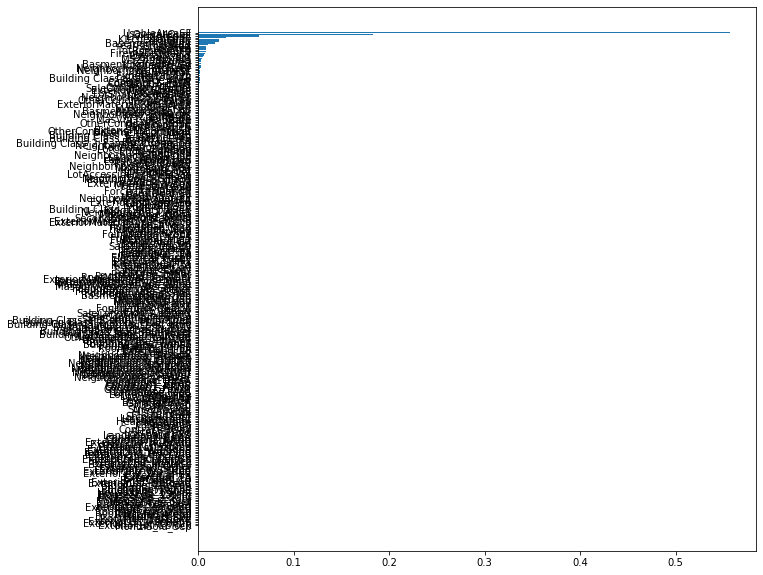

                                   Feature        Weight
66                            UsableAreaSF  5.566418e-01
2                              OverallQual  1.829758e-01
67                            LivingAreaSF  6.351683e-02
13                                2ndFlrSF  2.851390e-02
54                          KitchenQuality  2.161315e-02
4                                YearBuilt  2.137612e-02
50                         BasementQuality  1.697246e-02
5                             YearRemodAdd  1.024100e-02
15                               GrLivArea  8.555294e-03
1                                  LotArea  8.518108e-03
22                            TotRmsAbvGrd  8.369348e-03
7                               BsmtFinSF1  8.131943e-03
55                        FireplaceQuality  6.475203e-03
3                              OverallCond  5.943810e-03
25                              GarageCars  4.482844e-03
69                             MSZoning_RM  3.361725e-03
37                             

In [186]:
ShowModel = models_list[models_list["Name"] == "GradientBoostingRegressor"]["ModelData"].iloc[0]

ShowImportantFeatures(ShowModel, 300)

In [183]:
TrainingData = RawData[[ "SalePrice",
#                        "MSSubClass",
#                        "MSZoning",
                        "LotFrontage",
#                        "LotArea",
#                        "Street",
#                        "Alley",
#                        "LotShape",
#                        "LandContour",
#                        "Utilities",
#                        "LotConfig",
#                        "LandSlope",
                        "Neighborhood",
#                        "Condition1",
#                        "Condition2",
#                        "BldgType",
#                        "HouseStyle",
                        "OverallQual",
#                        "OverallCond",
#                        "YearBuilt",
#                        "YearRemodAdd",
#                        "RoofStyle",
#                        "RoofMatl",
#                        "Exterior1st",
#                        "Exterior2nd",
                        "MasVnrType",
                       "MasVnrArea",
                        "ExterQual",
#                        "ExterCond",
                        "Foundation",
                        "BsmtQual",
#                        "BsmtCond",
#                        "BsmtExposure",
                        "BsmtFinType1",
                        "BsmtFinSF1",
#                        "BsmtFinType2",
#                        "BsmtFinSF2",
#                        "BsmtUnfSF",
                        "TotalBsmtSF",
#                        "Heating",
#                        "HeatingQC",
#                        "CentralAir",
#                        "Electrical",
                        "1stFlrSF",
#                        "2ndFlrSF",
#                        "LowQualFinSF",
                        "GrLivArea",
#                        "BsmtFullBath",
#                        "BsmtHalfBath",
                        "FullBath",
#                        "HalfBath",
#                        "BedroomAbvGr",
#                        "KitchenAbvGr",
                        "KitchenQual",
                        "TotRmsAbvGrd",
#                        "Functional",
                        "Fireplaces",
#                        "FireplaceQu",
                        "GarageType",
                        "GarageYrBlt",
                        "GarageFinish",
                        "GarageCars",
                        "GarageArea",
#                        "GarageQual",
#                        "GarageCond",
#                        "PavedDrive",
#                        "WoodDeckSF",
#                        "OpenPorchSF",
#                        "EnclosedPorch",
#                        "3SsnPorch",
#                        "ScreenPorch",
#                        "PoolArea",
#                        "PoolQC",
#                        "Fence",
#                        "MiscFeature",
#                        "MiscVal",
#                        "MoSold",
#                        "YrSold",
#                        "SaleType",
#                        "SaleCondition",

                        "BuildingClass",
#                        "SplitLevel",
#                        "Utility-All",
                        "AgeGroup",
                        "Styling",
#                        "ExteriorMaterialType",
                        "ExteriorQuality",
                        "BasementQuality",
#                        "BasementCondition",
                        "SaleCondition",
#                        "NormalSale",
                        "UsableAreaSF",
                        "LivingAreaSF",
]]

KeyError: "['AgeGroup', 'BsmtFinType1', 'GarageYrBlt', 'GarageType'] not in index"